<a href="https://colab.research.google.com/github/lalitha-sahitya/Dog-vs-Cat-Classification/blob/main/Dog_and_Cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/dogs-vs-cats')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:06<00:00, 135MB/s]



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


In [4]:
os.listdir('dogs-vs-cats')

['test1.zip', 'train.zip', 'sampleSubmission.csv']

In [5]:
import pandas as pd

In [7]:
from zipfile import ZipFile
dataset='//content/dogs-vs-cats/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
file_list=os.listdir('train')
file_list

['cat.10214.jpg',
 'cat.376.jpg',
 'cat.8637.jpg',
 'dog.8390.jpg',
 'dog.11620.jpg',
 'cat.2630.jpg',
 'dog.9577.jpg',
 'dog.4354.jpg',
 'dog.10831.jpg',
 'cat.4030.jpg',
 'cat.11491.jpg',
 'dog.3807.jpg',
 'cat.2932.jpg',
 'dog.1123.jpg',
 'dog.1891.jpg',
 'dog.582.jpg',
 'cat.2616.jpg',
 'cat.11643.jpg',
 'cat.9154.jpg',
 'dog.3325.jpg',
 'dog.6093.jpg',
 'cat.9982.jpg',
 'dog.480.jpg',
 'dog.850.jpg',
 'cat.4420.jpg',
 'cat.4497.jpg',
 'cat.10199.jpg',
 'cat.8524.jpg',
 'cat.2655.jpg',
 'cat.8271.jpg',
 'cat.11050.jpg',
 'cat.9798.jpg',
 'cat.3650.jpg',
 'cat.7323.jpg',
 'dog.11677.jpg',
 'dog.10742.jpg',
 'cat.3678.jpg',
 'cat.6698.jpg',
 'dog.10533.jpg',
 'dog.3190.jpg',
 'dog.6327.jpg',
 'cat.10773.jpg',
 'cat.6820.jpg',
 'dog.7292.jpg',
 'cat.9437.jpg',
 'dog.371.jpg',
 'dog.5026.jpg',
 'dog.10424.jpg',
 'dog.6419.jpg',
 'cat.6685.jpg',
 'cat.8060.jpg',
 'dog.6875.jpg',
 'dog.5056.jpg',
 'dog.801.jpg',
 'dog.6823.jpg',
 'cat.3866.jpg',
 'dog.8729.jpg',
 'dog.9506.jpg',
 'dog.12

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from google.colab.patches import cv2_imshow

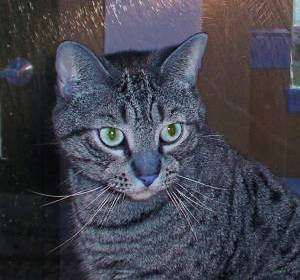

In [12]:
img=mpimg.imread('train/cat.1.jpg')
cv2_imshow(img)

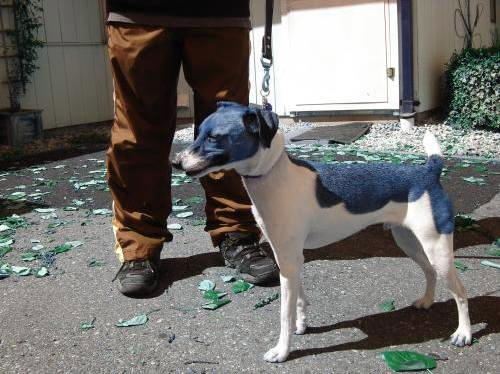

In [13]:
img=mpimg.imread('/content/train/dog.4023.jpg')
cv2_imshow(img)

In [17]:
file_list=os.listdir('/content/train')
c=0
d=0
for i in range(len(file_list)):
  if 'cat' in file_list[i]:
    c+=1
  if 'dog' in file_list[i]:
    d+=1

In [18]:
c

12500

In [19]:
d

12500

In [20]:
os.mkdir('/content/img_resized')

In [21]:
original_folder='/content/train/'
resized_folder='/content/img_resized/'
for i in range(2000):
  file_name=os.listdir(original_folder)[i]
  img_path=original_folder+file_name
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  img.save(resized_folder+file_name)

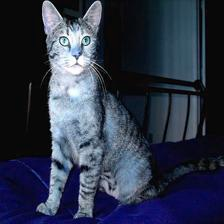

In [23]:
img=mpimg.imread('/content/img_resized/cat.10000.jpg')
cv2_imshow(img)

In [24]:
filenames=os.listdir('/content/img_resized/')
labels=[]
for i in range(2000):
  filename=filenames[i]
  if 'cat' in filename:
    labels.append(0)
  else:
    labels.append(1)

In [25]:
len(filenames)

2000

In [26]:
filenames[:5]

['cat.10214.jpg',
 'cat.376.jpg',
 'cat.8637.jpg',
 'dog.8390.jpg',
 'dog.11620.jpg']

In [27]:
len(labels)

2000

In [28]:
labels[:5]

[0, 0, 0, 1, 1]

In [29]:
values,counts=np.unique(labels,return_counts=True)

In [30]:
values

array([0, 1])

In [31]:
counts

array([ 985, 1015])

In [32]:
import cv2
import glob

In [33]:
image_directory='/content/img_resized'
img_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_directory+'*.'+e)) for e in img_extension]
dog_cat_images=np.array([cv2.imread(file) for file in files])